## NYC Accident Data Analysis

GOAL : The purpose of the analysis to identify causes of accidents in Brookly and suggest any concrete steps to take in order to reduce both, injuries and fatalities arising from these accidents. 

APPROACH : We will begin with initial preprocssing of our data to limit the analysis only for analysis from January 1, 2014 to December 31, 2017. To further understand the data, we can look to perform some initial exploratory data analysis followed by some time-series analysis to identify any overall trends in the numbers.


#### Data Load-up and Pre-processing

In [1]:
# Loading the necessary working libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
# After exporting the file from Google Big-query; Uploading the file as a JSON 
with open("/Users/raoul.fernandes/Downloads/bq-results-20210415-140617-iahnxhd8raar.json") as f:
    content = f.readlines()

data = [eval(c) for c in content]
data = pd.DataFrame(data)

In [3]:
# Preview of the data set
data.sample(5)

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,cross_street_name,timestamp,latitude,longitude,location,number_of_cyclist_injured,number_of_cyclist_killed,...,vehicle_type_code1,vehicle_type_code2,zip_code,contributing_factor_vehicle_3,vehicle_type_code_3,off_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
1758160,BROOKLYN,Unspecified,Unspecified,STERLING PLACE,2017-05-19T16:20:00,40.670715,-73.916970,"(40.670715, -73.91697)",0,0,...,Sedan,Station Wagon/Sport Utility Vehicle,11233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117051,QUEENS,Backing Unsafely,NaN,24 AVENUE,2018-02-12T11:00:00,40.764850,-73.886120,"(40.76485, -73.88612)",0,0,...,Station Wagon/Sport Utility Vehicle,NaN,11370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1405892,NaN,Unspecified,Unspecified,NaN,2014-10-13T14:45:00,NaN,NaN,NaN,0,0,...,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,129 AVE & GUY R BREWER IO OF PARKING LOT,NaN,NaN,NaN,NaN
599957,QUEENS,Backing Unsafely,Unspecified,BOOTH MEMORIAL AVENUE,2018-07-01T10:10:00,40.740658,-73.789635,"(40.740658, -73.789635)",0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,11365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558924,QUEENS,Passing or Lane Usage Improper,Unspecified,78 AVENUE,2018-03-28T17:50:00,40.715120,-73.832240,"(40.71512, -73.83224)",0,0,...,Bus,Station Wagon/Sport Utility Vehicle,11375,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Identifying issues in the data types for the various columns in the data set
data.dtypes

borough                           object
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
cross_street_name                 object
timestamp                         object
latitude                         float64
longitude                        float64
location                          object
number_of_cyclist_injured         object
number_of_cyclist_killed          object
number_of_motorist_injured        object
number_of_motorist_killed         object
number_of_pedestrians_injured     object
number_of_pedestrians_killed      object
number_of_persons_injured         object
number_of_persons_killed          object
on_street_name                    object
unique_key                        object
vehicle_type_code1                object
vehicle_type_code2                object
zip_code                          object
contributing_factor_vehicle_3     object
vehicle_type_code_3               object
off_street_name                   object
contributing_fac

In [5]:
# Count the % of NA's in the each of the columns of the dataset
pd.DataFrame(round((data.isnull().sum() / data.shape[0] *100),2).sort_values(), columns=['Missing Value %'])

,Missing Value %
number_of_pedestrians_killed,0.00
number_of_persons_killed,0.00
number_of_persons_injured,0.00
number_of_pedestrians_injured,0.00
number_of_motorist_killed,0.00
number_of_motorist_injured,0.00
number_of_cyclist_killed,0.00
number_of_cyclist_injured,0.00
timestamp,0.00
unique_key,0.00


In [6]:
# Dropping all columns with a larger proportion of missing values
data = data.drop(columns=['off_street_name','contributing_factor_vehicle_3','vehicle_type_code_3',
                     'contributing_factor_vehicle_4','vehicle_type_code_4',
                     'contributing_factor_vehicle_5','vehicle_type_code_5'])

In [7]:
# Remove any rows from the dataset where we do not know the borough
data = data[data['borough'].notna()]

# Possible solution to this problem can be use the latitude and longitude to map the borough

In [8]:
#Converting required columns to numeric for further analysis
cols = ['number_of_cyclist_injured','number_of_cyclist_killed',
        'number_of_motorist_injured','number_of_motorist_killed',
        'number_of_pedestrians_injured','number_of_pedestrians_killed',
        'number_of_persons_injured','number_of_persons_killed']
data[cols] = data[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
#Converting the timestamp column to date-time for future time-series analysis
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [9]:
# Restructuing the dataframe 
data_org = data.melt(id_vars=['borough','unique_key','timestamp','zip_code','contributing_factor_vehicle_1',
                              'vehicle_type_code1','location','latitude','longitude','contributing_factor_vehicle_2',
                              'vehicle_type_code2','on_street_name','cross_street_name'],
                     var_name = 'temp1',
                     value_name = 'Injured/Killed')

In [10]:
# Previewing the new data frame
data_org.head()

,borough,unique_key,timestamp,zip_code,contributing_factor_vehicle_1,vehicle_type_code1,location,latitude,longitude,contributing_factor_vehicle_2,vehicle_type_code2,on_street_name,cross_street_name,temp1,Injured/Killed
0,MANHATTAN,3173903,2015-02-23 11:30:00,10012,Fatigued/Drowsy,TAXI,"(40.7284238, -73.9996789)",40.728424,-73.999679,Unspecified,LIVERY VEHICLE,BLEECKER STREET,THOMPSON STREET,number_of_cyclist_injured,0.0
1,MANHATTAN,3192435,2015-03-20 20:30:00,10128,Other Vehicular,LIVERY VEHICLE,"(40.7838899, -73.9502838)",40.783890,-73.950284,Other Vehicular,LIVERY VEHICLE,EAST 94 STREET,3 AVENUE,number_of_cyclist_injured,0.0
2,MANHATTAN,3178849,2015-03-03 16:00:00,10010,Fatigued/Drowsy,TAXI,"(40.7429104, -73.9928041)",40.742910,-73.992804,Unspecified,LIVERY VEHICLE,WEST 23 STREET,6 AVENUE,number_of_cyclist_injured,0.0
3,MANHATTAN,3184787,2015-03-10 09:34:00,10025,Driver Inattention/Distraction,SPORT UTILITY / STATION WAGON,"(40.7997008, -73.9699638)",40.799701,-73.969964,Driver Inexperience,LIVERY VEHICLE,WEST END AVENUE,WEST 103 STREET,number_of_cyclist_injured,0.0
4,MANHATTAN,3162804,2015-02-03 08:45:00,10010,Driver Inattention/Distraction,SMALL COM VEH(4 TIRES),"(40.7378861, -73.9809038)",40.737886,-73.980904,Unspecified,LIVERY VEHICLE,2 AVENUE,EAST 23 STREET,number_of_cyclist_injured,0.0


In [11]:
# Filtering the dataset to 2014-01-01 to 2017-12-31
date_filt = (data_org['timestamp'] >= '2014-01-01 00:00:00') & (data_org['timestamp'] <= '2017-12-31 11:59:59')
data_org = data_org.loc[date_filt,:]

In [12]:
# Data clean-up and pre-processing
# Restructuring the temp column; removing the 'number_of' phrase
data_org['temp1'] = data_org['temp1'].str.replace('number_of_','')
# Splitting the column into 2 columns - Commuter Type and Injury Type for easier analysis and insights derivation
data_org[['Commuter Type','Injury Type']] = data_org['temp1'].str.split('_',expand = True)
# Dropping the temp column
data_org = data_org.drop(columns='temp1')

In [13]:
tabular_breakdown = pd.DataFrame(data_org.groupby(['borough','Commuter Type','Injury Type']).agg({'Injured/Killed':sum}))
tabular_breakdown = tabular_breakdown.reset_index()
filt = tabular_breakdown['Commuter Type'] == 'persons'
tabular_breakdown_totals = tabular_breakdown.loc[filt,:]
tabular_breakdown = tabular_breakdown.loc[~filt,:]

### Exploratory Data Analysis

#### 1. Understanding the number of accidents across the different NYC boroughs

#### 2. Segmenting the number of commuters (commuter type) by injury yype (Injured/Killed)

#### 3. Segmenting the number of accidents by injury type

Text(0.5,1,'Borough-wise Acciddents in NYC from 2014-17')

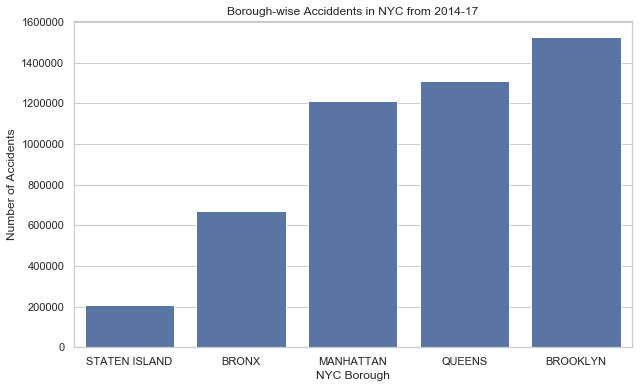

In [14]:
temp_data1 = pd.DataFrame(data_org.groupby('borough')['unique_key'].count().sort_values())
temp_data1 = temp_data1.reset_index()
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'borough',
            y = 'unique_key',
            color = 'b',
            data = temp_data1)
plt.xlabel("NYC Borough")
plt.ylabel("Number of Accidents")
plt.title("Borough-wise Acciddents in NYC from 2014-17")

#### Inference:

The most number of accidents during 2012-17 have occurred in the Brooklyn borough; followed by Queens, Manhattan, Bronx and Staten Island.

Text(0.5,0.98,'Borough-wise comparison of Injuries by Commuter Type')

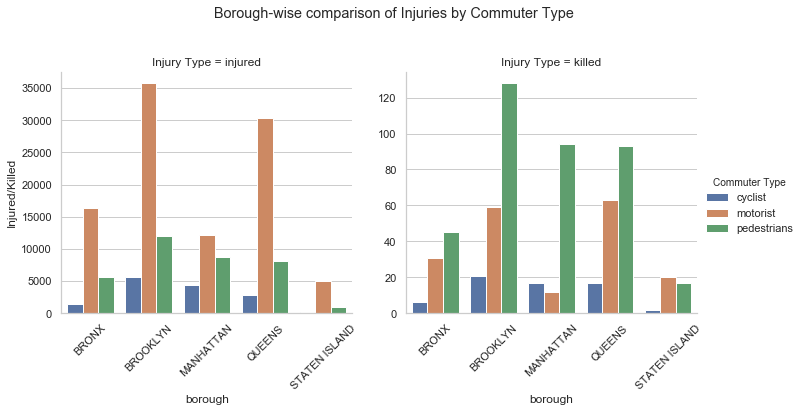

In [15]:
plt.figure(figsize=(12,8))
g = sns.catplot(x = 'borough',
            y = 'Injured/Killed',
            hue = 'Commuter Type',
            col = 'Injury Type',
            sharey = False,
            data = tabular_breakdown,
            kind = 'bar')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Borough-wise comparison of Injuries by Commuter Type")

Text(0.5,0.98,'Borough-wise comparison of Total Injuries')

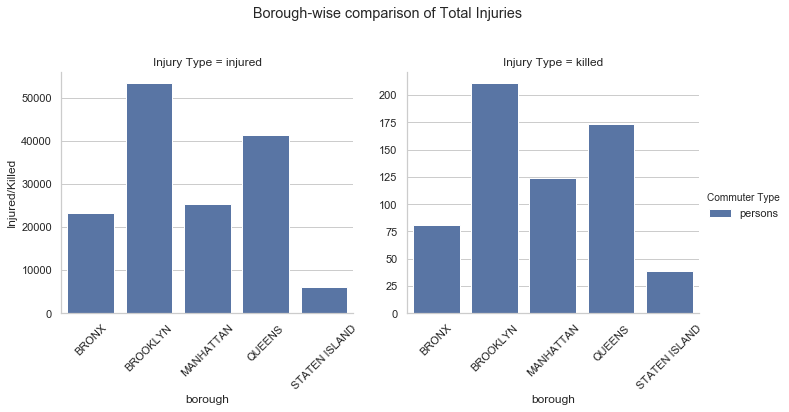

In [16]:
grid = sns.catplot(x = 'borough',
            y = 'Injured/Killed',
            hue = 'Commuter Type',
            col = 'Injury Type',
            sharey = False,
            data = tabular_breakdown_totals,
            kind = 'bar')
for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Borough-wise comparison of Total Injuries")

#### Inference:

Upon segmenting commuters by injury type, we see that the Brooklyn borough has the most number of accidents where the number of injured and killed are the highest. This should be intuitive as some may suggest that the borough of Manhattan is where we would expect the most number of accidents. However, Manhattan has much more stringent rules and regulations on driving on the island. Additionally, because traffic in Manhattan moves comparitively much slower than that in Brooklyn, we see fewer accidents in the area. 

### Time Series Analysis and Plots

#### 1. Borough-wise Accidents in NYC from 2014-17 (by years)

#### 2. Borough-wise Accidents in NYC from 2014-17 (by months)

#### 3. Borough-wise Accidents in NYC from 2014-17 (by hour)

#### 4. Fatality Rate of accidents in NYC from (2014-17)

In [17]:
data_org_time = data_org.set_index('timestamp')

Text(0.5,1,'Borough-wise Accidents in NYC from 2014-17 (by years)')

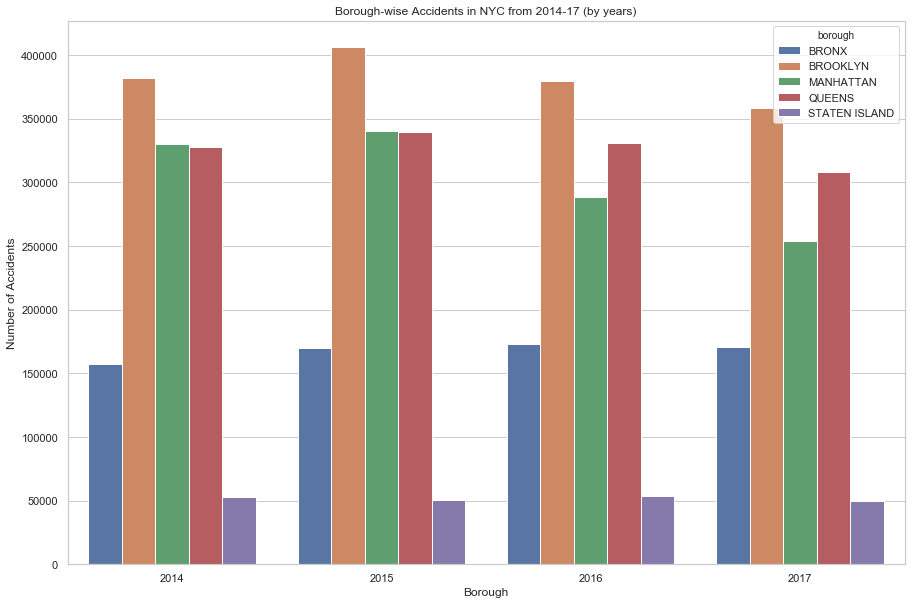

In [18]:
temp_tab2 = pd.DataFrame(data_org.groupby([data_org['timestamp'].dt.year,'borough'])['unique_key'].count()).reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x = 'timestamp',
            y = 'unique_key',
            hue = 'borough',
            data = temp_tab2)
plt.xlabel("Borough")
plt.ylabel("Number of Accidents")
plt.title("Borough-wise Accidents in NYC from 2014-17 (by years)")

Text(0.5,1,'Borough-wise Accidents in NYC from 2014-17 (by months)')

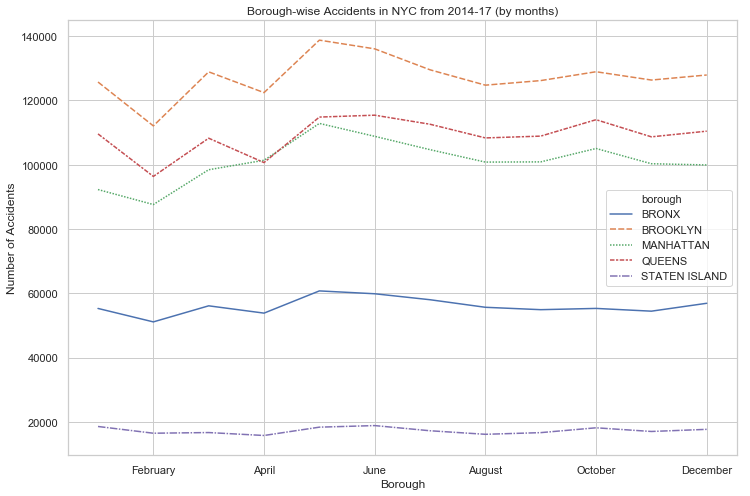

In [19]:
temp_tab3 = pd.DataFrame(data_org.groupby([data_org['timestamp'].dt.month,'borough'])['unique_key'].count()).reset_index()
plt.figure(figsize=(12,8))
f = sns.lineplot(x = 'timestamp',
            y = 'unique_key',
            hue = 'borough',
            style = 'borough',
            data = temp_tab3)
plt.xlabel("Borough")
f.set(xticklabels = ['','February','April','June','August','October','December'])
plt.ylabel("Number of Accidents")
plt.title("Borough-wise Accidents in NYC from 2014-17 (by months)")

#### Inference:

The monthly trend does not change much for the slight drop in February and April followed by gradual increases in March and May, the cause of which remains unknown. But using general information, we can speculate that April markes the end of snowfall and leads to improved visibility. The lower numbers in the winter months may be attributed to the fact the most people tend to stay indoors.

Text(0.5,1,'Borough-wise Accidents in NYC from 2014-17 (by hour)')

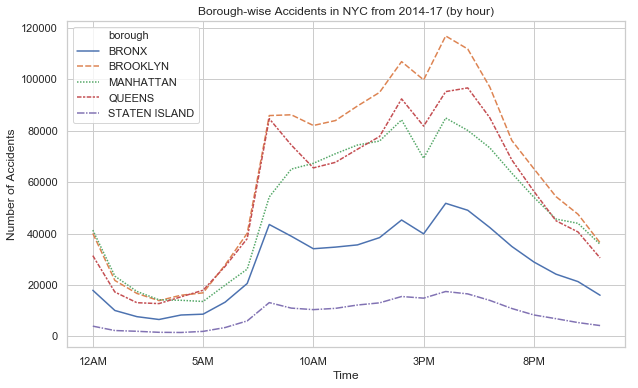

In [20]:
temp_tab4 = pd.DataFrame(data_org.groupby([data_org['timestamp'].dt.hour,'borough'])['unique_key'].count()).reset_index()
plt.figure(figsize=(10,6))
g = sns.lineplot(x = 'timestamp',
            y = 'unique_key',
            hue = 'borough',
            style = 'borough',
            data = temp_tab4)
plt.xlabel("Time")
plt.ylabel("Number of Accidents")
g.set(xticklabels = ['','12AM','5AM','10AM','3PM','8PM'])
plt.title("Borough-wise Accidents in NYC from 2014-17 (by hour)")

#### Inference:

The daily trends give us a very interesting idea of how many accidents occur during a given hour of the day. We see substantial increases in the number of collissions during the morning (7am - 9am) and evening (4pm - 6pm) rush hours. The increase during the work hours (9am - 4pm) can be attributed to the number of collissions caused by delivery in and around the city. Another interesting trend is the peak at roughly 12AM in the night; this can be attributed to those are our living their "nightlife".

In [21]:
tabular_breakdown_totals_t = data_org[data_org['Commuter Type'] == 'persons']
tabular_breakdown_totals_t = data_org.groupby([data_org['timestamp'].dt.year,'borough','Injury Type']).agg({'Injured/Killed':sum})

In [22]:
tabular_breakdown_totals_t = tabular_breakdown_totals_t.pivot_table('Injured/Killed',['timestamp','borough'],'Injury Type')
tabular_breakdown_totals_t.reset_index(drop=False,inplace = True)

Text(0.5,1,'Fatality Rate from 2014-17')

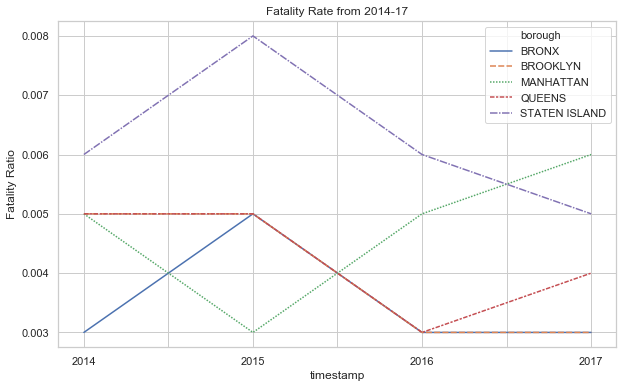

In [23]:
tabular_breakdown_totals_t['people involved'] = tabular_breakdown_totals_t['killed'] + tabular_breakdown_totals_t['injured']
tabular_breakdown_totals_t['Fatality Ratio'] = round(tabular_breakdown_totals_t['killed']/tabular_breakdown_totals_t['people involved'],3)
plt.figure(figsize=(10,6))
g = sns.lineplot(x = 'timestamp',
             y = 'Fatality Ratio',
             hue = 'borough',
             style = 'borough',
             data = tabular_breakdown_totals_t)
g.set(xticklabels = ['','2014','','2015','','2016','','2017'])
plt.title('Fatality Rate from 2014-17')

#### Inference: 

Over the period of years from 2014 thru 2017, we see a decrease in the fatality rate across the boroughs expect for a noticable increase from 2015 in Manhattan and a slight increase from 2016 in Queens. Upon external research, I learned that the city council of Brooklyn has enacted certain rules and regulations which have led to a factor in the fatality rates declining. 

### Understanding the data specific to Brooklyn

#### 1. Understanding the leading causes for accidents in Brooklyn

#### 2. Understanding the vehicle types for accidents in Brooklyn

#### 3. Fatality Rate of accidents in Brooklyn from (2014-17)

In [24]:
data_brooklyn = data_org[data_org['borough'] == 'BROOKLYN']

In [25]:
temp_table5 = pd.DataFrame(data_brooklyn.groupby('contributing_factor_vehicle_1')['unique_key'].count().sort_values(ascending = False))
temp_table5 = temp_table5.reset_index()
temp_table5 = temp_table5.iloc[1:,:]
temp_table5 = temp_table5.nlargest(15,'unique_key')

Text(0.5,1,'Top 10 Causes for Accidents in Brooklyn')

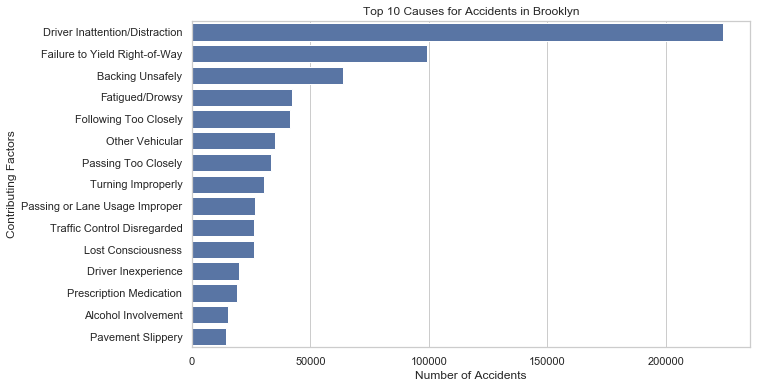

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'unique_key',
            y = 'contributing_factor_vehicle_1',
            color = 'b',
            data= temp_table5)

plt.ylabel("Contributing Factors")
plt.xlabel("Number of Accidents")
plt.title("Top 10 Causes for Accidents in Brooklyn")

#### Inference: 

Prior to creating this graphic, we filtered out for the reason - Unspecified. We can further remove driver inattention and failure to yield right-of-way as these are too generic. However, for the purpose of this analysis, I have left it as is. 

We clearly see that the leading driver for accidents in Brooklyn is driver inattention and distraction followed by failure to yield right-of-way, backing unsafely. However, we start to see some genuine reasons such as backing unsafely, fatigue/drowsy, following too closely etc. In this case, traffic rule awareness programs that emphasize on the importance of concentrating on the road and being focused, as well as stricter actions against violations might help to lower such cases.

We also see alcohol and prescriptions medication as reasons for accidents. These are clear cases of violations of traffic laws and suggest that there may be a need for greater enforcement and stricter fines.

Finally, we also see pavement slippery as a cause. This would be a genuine concern during rainfall and snow and as such, the city council would required to invest in the infrastructure of the roads, signage and proper markers to guide motorists.

In [27]:
temp_table6 = pd.DataFrame(data_brooklyn.groupby('vehicle_type_code1')['unique_key'].count().sort_values(ascending = False))
temp_table6 = temp_table6.reset_index()
temp_table6 = temp_table6.nlargest(10,'unique_key')

Text(0.5,1,'Top 10 vehicle types for Accidents in Brooklyn')

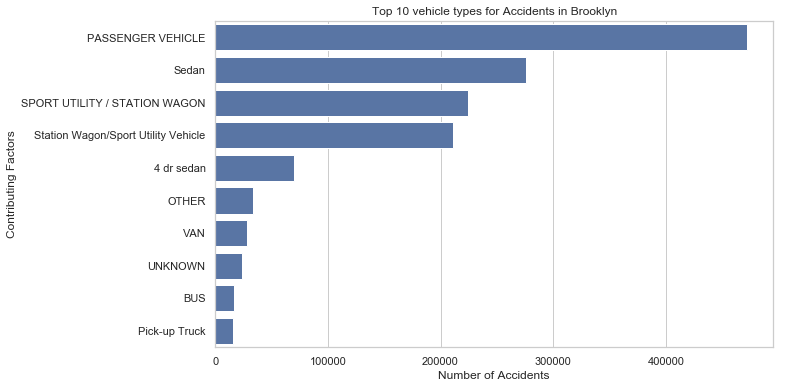

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'unique_key',
            y = 'vehicle_type_code1',
            color = 'b',
            data= temp_table6)

plt.ylabel("Contributing Factors")
plt.xlabel("Number of Accidents")
plt.title("Top 10 vehicle types for Accidents in Brooklyn")

#### Inference:
    
We could further group the Sedans and SUV vehicles groups however, that would not yield any meaningful results. As the number of passenger vehicles will be substantially higher than vans and busses, it would make sense for most accidents to be caused by passanger cars. 

Text(0.5,1,'Fatality Rate from 2014-17')

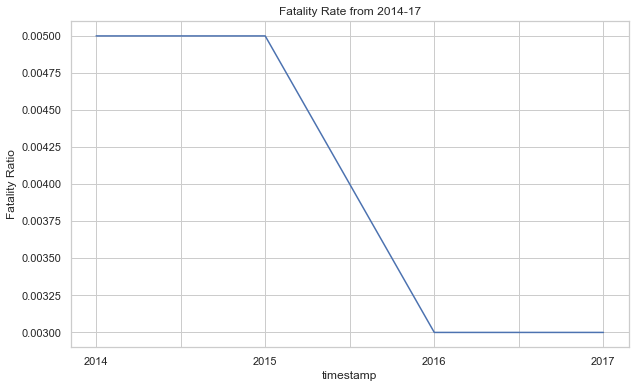

In [29]:
tabular_breakdown_totals_brooklyn = tabular_breakdown_totals_t[tabular_breakdown_totals_t['borough']=='BROOKLYN']
plt.figure(figsize=(10,6))
g = sns.lineplot(x = 'timestamp',
             y = 'Fatality Ratio',
             data = tabular_breakdown_totals_brooklyn)
g.set(xticklabels = ['','2014','','2015','','2016','','2017'])
plt.title('Fatality Rate from 2014-17')

As a further confirmation to our time series plot earlier, we see that the fatality rate in Brooklyn have decreased from 2015 to 2016. However, given certain factors identified earlier, fatalities and injuries could be reduced by stringent enforcement of rules and regulations.

## Recommendations

1. Increased deployment of traffic rule awareness programs on importance of concentrating on the road and being focused, and strict actions on violations to increase motorists attention while driving

2. Stricter enforcement of actions on violations of driving under the influence of alcohol and prescription medications

3. Improvement in infrastructure and signage to help guide motorists for turning and clearly visible speed limits and lane markings for bicyclists and vehicles

4. Clear signs and timers posted on street-crossing for pedestrians

5. Addition of reflectors and reflecting paint to help motorists during low visibility days and evenings
